In [1]:
import pandas as pd
import plotly.express as px

from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport

In [2]:
import seaborn as sns
from tqdm import tqdm

In [ ]:
sample_transport = RequestsHTTPTransport(url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',
                                        verify=True, retries=3)
client = Client(transport=sample_transport)


all_swaps = []
last_timestamp = 0

for skip in tqdm(range(0, 100)):
    try:
        contract_id = '0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc'
        query = gql(
        'query {\n'
            f'swaps(first: 1000, where: {{ pair: "{contract_id}", timestamp_gt: {last_timestamp} }} orderBy: timestamp, orderDirection: asc) {{\n'
              'transaction {\nid\ntimestamp\n}\n'
              'id\n'
              'pair {\n'
                'token0 {\nid\nsymbol\n}\n'
                'token1 {\nid\nsymbol\n}\n'
              '}\n'
              'amount0In\namount0Out\n'
              'amount1In\namount1Out\n'
              'amountUSD\n'
              'to\n'
            '}\n'
        '}\n')

        response = client.execute(query)
        last_timestamp = response['swaps'][-1]['transaction']['timestamp']
        all_swaps.extend(response['swaps'])

    except Exception as e:
        print(e)


In [ ]:
for skip in tqdm(range(0, 350)):
    try:
        contract_id = '0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc'

        query = gql(
        'query {\n'
            f'swaps(first: 1000, where: {{ pair: "{contract_id}", timestamp_gt: {last_timestamp} }} orderBy: timestamp, orderDirection: asc) {{\n'
              'transaction {\nid\ntimestamp\n}\n'
              'id\n'
              'pair {\n'
                'token0 {\nid\nsymbol\n}\n'
                'token1 {\nid\nsymbol\n}\n'
              '}\n'
              'amount0In\namount0Out\n'
              'amount1In\namount1Out\n'
              'amountUSD\n'
              'to\n'
            '}\n'
        '}\n')

        response = client.execute(query)
        last_timestamp = response['swaps'][-1]['transaction']['timestamp']
        all_swaps.extend(response['swaps'])

    except Exception as e:
        print(e)


In [6]:
len(all_swaps)

99000

In [7]:
len(all_swaps)

99000

In [8]:
all_swaps[0]

{'amount0In': '0',
 'amount0Out': '0.001',
 'amount1In': '0.000004873849709289',
 'amount1Out': '0',
 'amountUSD': '0.0005010015015000956886748521217951267',
 'id': '0x932cb88306450d481a0e43365a3ed832625b68f036e9887684ef6da594891366-0',
 'pair': {'token0': {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
   'symbol': 'USDC'},
  'token1': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
   'symbol': 'WETH'}},
 'to': '0x8688a84fcfd84d8f78020d0fc0b35987cc58911f',
 'transaction': {'id': '0x932cb88306450d481a0e43365a3ed832625b68f036e9887684ef6da594891366',
  'timestamp': '1588712972'}}

In [9]:
all_swaps[0]

{'amount0In': '0',
 'amount0Out': '0.001',
 'amount1In': '0.000004873849709289',
 'amount1Out': '0',
 'amountUSD': '0.0005010015015000956886748521217951267',
 'id': '0x932cb88306450d481a0e43365a3ed832625b68f036e9887684ef6da594891366-0',
 'pair': {'token0': {'id': '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48',
   'symbol': 'USDC'},
  'token1': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
   'symbol': 'WETH'}},
 'to': '0x8688a84fcfd84d8f78020d0fc0b35987cc58911f',
 'transaction': {'id': '0x932cb88306450d481a0e43365a3ed832625b68f036e9887684ef6da594891366',
  'timestamp': '1588712972'}}

In [10]:
def transform(swap):
    if swap['amount0In'] != '0':
        token_in = swap['pair']['token0']['symbol']
        token_out = swap['pair']['token1']['symbol']
        amount_in = swap['amount0In']
        amount_out = swap['amount1Out']
    else:
        token_in = swap['pair']['token1']['symbol']
        token_out = swap['pair']['token0']['symbol']
        amount_in = swap['amount1In']
        amount_out = swap['amount0Out']
        
    amount_usd = swap['amountUSD']
    timestamp = swap['transaction']['timestamp']
    
    return {
        'token_in': token_in, 'token_out': token_out,
        'amount_in': amount_in, 'amount_out': amount_out,
        'amount_usd': amount_usd,
        'timestamp': timestamp
    }

In [11]:
all_swaps_transformed = [
    transform(swap) for swap in all_swaps
]

In [12]:
swaps_df[swaps_df.amount_in == 0]

NameError: name 'swaps_df' is not defined

In [40]:
swaps_df = pd.DataFrame(all_swaps_transformed)

In [41]:
swaps_df['amount_in'] = swaps_df['amount_in'].astype('float')
swaps_df['amount_out'] = swaps_df['amount_out'].astype('float')
swaps_df['amount_usd'] = swaps_df['amount_usd'].astype('float')

In [42]:
swaps_df.tail(100)

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp
98900,WETH,USDC,0.061905,24.236628,24.177142,1596537408
98901,WETH,USDC,0.908610,355.713437,354.848993,1596537434
98902,USDC,WETH,1600.000000,4.061769,1591.653549,1596537518
98903,WETH,USDC,20.000000,7824.573879,7811.515400,1596537561
98904,USDC,WETH,151.397629,0.385061,150.768107,1596537590
...,...,...,...,...,...,...
98995,USDC,WETH,1000.000000,2.547479,994.403185,1596540485
98996,USDC,WETH,22650.914683,58.128286,22606.610392,1596540530
98997,WETH,USDC,100.392600,38972.302597,38966.465712,1596540530
98998,USDC,WETH,305.412765,0.781344,304.238842,1596540588


In [43]:
sns.set_theme()

In [44]:
swaps_df.tail()

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp
98995,USDC,WETH,1000.000000,2.547479,994.403185,1596540485
98996,USDC,WETH,22650.914683,58.128286,22606.610392,1596540530
98997,WETH,USDC,100.392600,38972.302597,38966.465712,1596540530
98998,USDC,WETH,305.412765,0.781344,304.238842,1596540588
98999,USDC,WETH,5000.000000,12.782486,4979.096607,1596540618


In [45]:
swaps_df = swaps_df.iloc[-30000:]

In [47]:
swaps_df.head()

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp
69000,WETH,USDC,5.036234,1422.224837,1412.276421,1595646688
69001,USDC,WETH,1995.210737,7.022000,1973.357298,1595646934
69002,WETH,USDC,10.000000,2823.813015,2796.067008,1595646943
69003,WETH,USDC,10.000000,2820.163322,2793.841168,1595646994
69004,USDC,WETH,3013.565062,10.621336,2976.836693,1595646996


Text(0.5, 1.0, 'Swaps WETH-USDC, histogram')

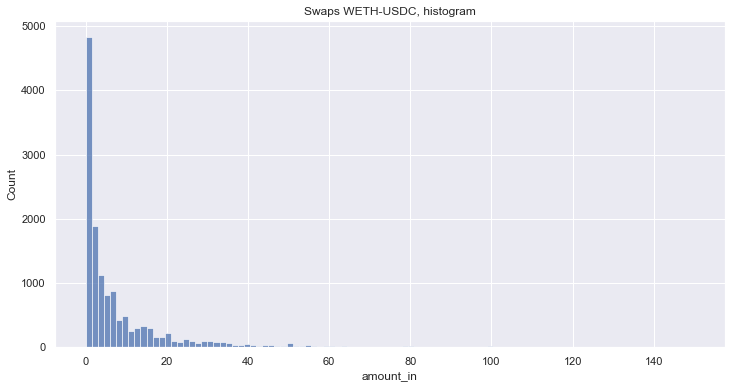

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(swaps_df[swaps_df['token_in'] == 'WETH'].amount_in, bins=100, binrange=[0, 150])
ax.set_title('Swaps WETH-USDC, histogram')

Text(0.5, 1.0, 'Swaps WETH-USDC, histogram')

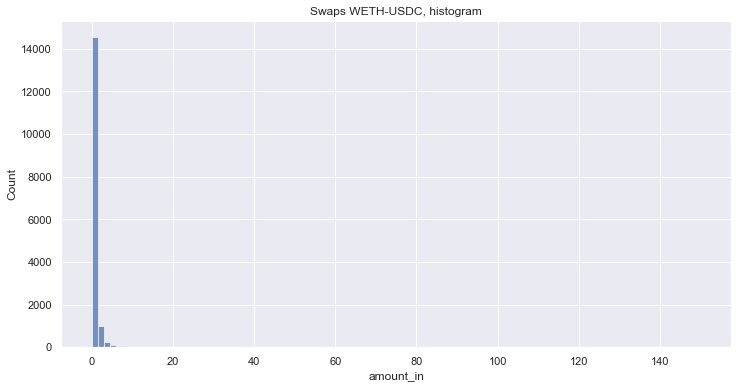

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(swaps_df[swaps_df['token_in'] == 'USDC'].amount_in / 6000, bins=100, binrange=[0, 150])
ax.set_title('Swaps WETH-USDC, histogram')

Text(0.5, 1.0, 'Swaps WETH-USDC, histogram')

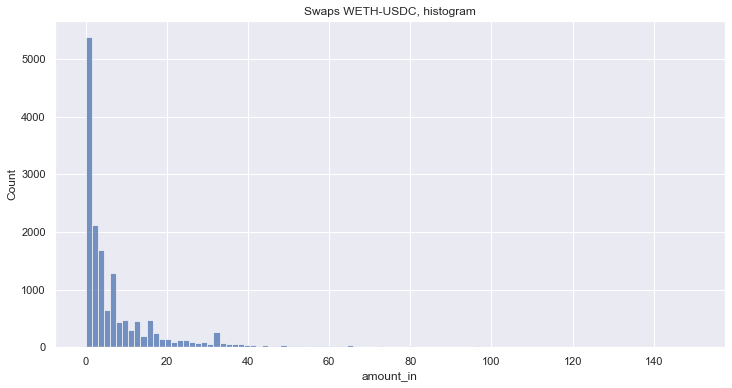

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(swaps_df[swaps_df['token_in'] == 'USDC'].amount_in / 310, bins=100, binrange=[0, 150])
ax.set_title('Swaps WETH-USDC, histogram')

In [18]:
max(swaps_df[swaps_df['token_in'] == 'USDC'].amount_in)

296400.0

Text(0.5, 1.0, 'Swaps USDC-WETH, histogram, binrange [0, 1500]')

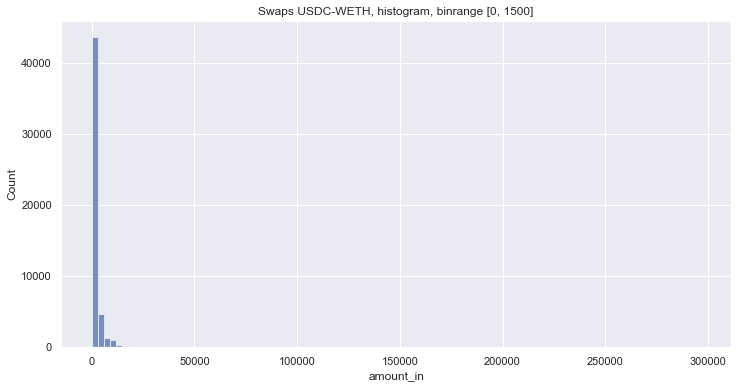

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(swaps_df[(swaps_df['token_in'] == 'USDC') ].amount_in, bins=100)
ax.set_title('Swaps USDC-WETH, histogram, binrange [0, 1500]')

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(swaps_df[(swaps_df['token_in'] == 'USDC') ].amount_in, bins=100)
ax.set_title('Swaps USDC-WETH, histogram, binrange [0, 1500]')

Text(0.5, 1.0, 'Swaps USDC-WETH, histogram')

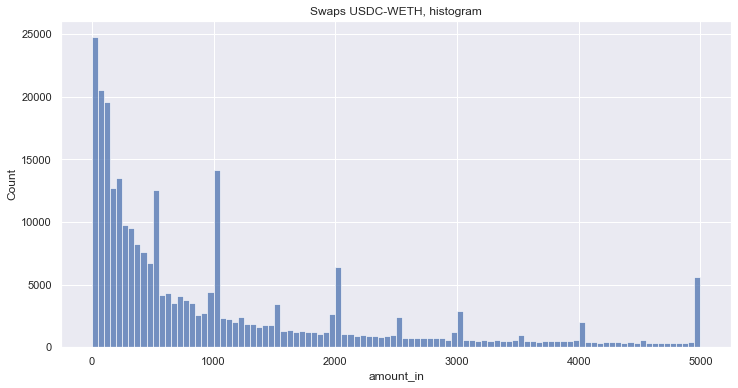

In [580]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(swaps_df[(swaps_df['token_in'] == 'USDC') ].amount_in, bins=100, binrange=[0, 5000])
ax.set_title('Swaps USDC-WETH, histogram')

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(swaps_df[swaps_df['token_in'] == 'USDC'].amount_in, bins=100, )

In [247]:
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 100)

In [248]:
swaps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695000 entries, 0 to 694999
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   token_in    695000 non-null  object 
 1   token_out   695000 non-null  object 
 2   amount_in   695000 non-null  float64
 3   amount_out  695000 non-null  float64
 4   amount_usd  695000 non-null  float64
 5   timestamp   695000 non-null  object 
dtypes: float64(3), object(3)
memory usage: 31.8+ MB


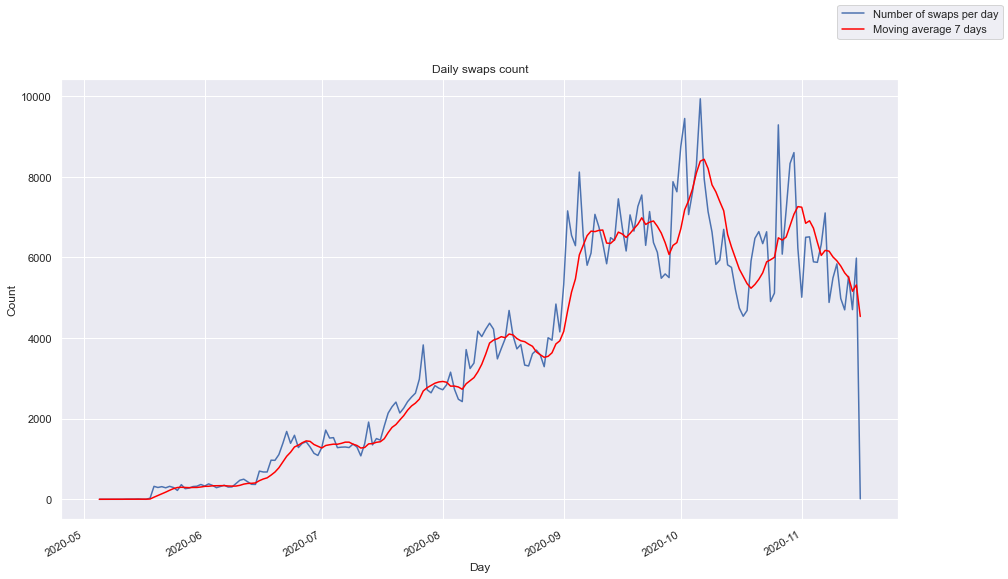

In [531]:
transactions_time = swaps_df.copy()
transactions_time.timestamp = pd.to_datetime(swaps_df.timestamp, unit='s')
# set index datetime column
transactions_time.index = transactions_time.timestamp
transactions_time = transactions_time.resample('1D').size()
transactions_avg_time = transactions_time.rolling('7D').mean()

fig, ax = plt.subplots(figsize=(15, 9))
fig.autofmt_xdate()

ax.plot_date(transactions_time.index, transactions_time, linestyle='solid', marker=None, label='Number of swaps per day')
ax.plot_date(transactions_avg_time.index, transactions_avg_time, linestyle='solid', marker=None, color='red', label='Moving average 7 days')
#ax.set_xlim(mess_time_tg_df.index.min(), mess_time_tg_df.index.max())
#ax.set_title("Message frequency over time (WhatsApp)")
ax.set_xlabel("Day")
ax.set_ylabel("Count")
ax.set_title("Daily swaps count")
fig.legend()

In the first 2 months the number of daily transactions is pretty low, and than in gradually starts increasing.
During the highest point, there are about 10 000 transactions per day, which is about 7 transactions per minute

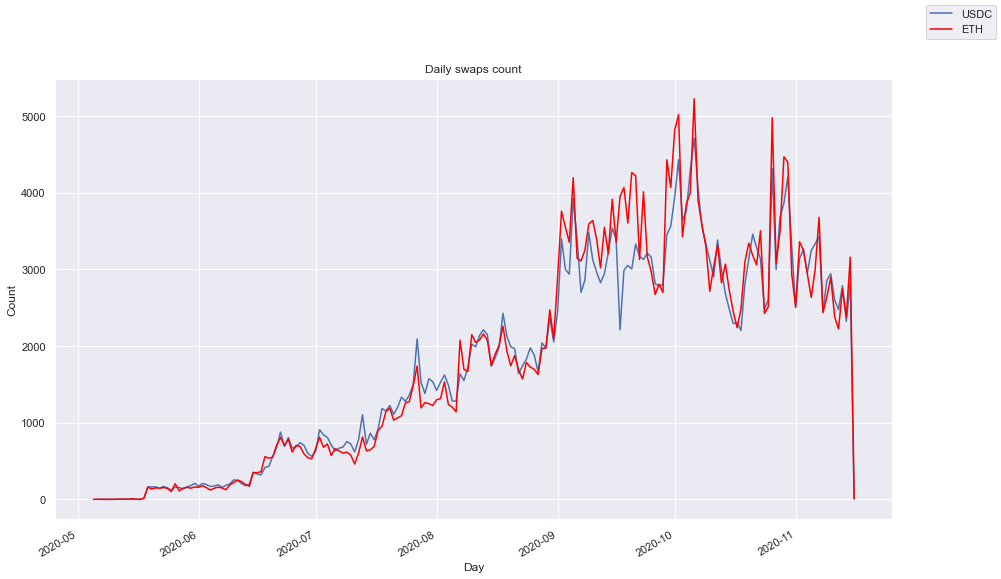

In [532]:
transactions_time = swaps_df[swaps_df.token_in == 'USDC'].copy()
transactions_time_eth = swaps_df[swaps_df.token_in == 'WETH'].copy()

transactions_time.timestamp = pd.to_datetime(transactions_time.timestamp, unit='s')
transactions_time_eth.timestamp = pd.to_datetime(transactions_time_eth.timestamp, unit='s')


# set index datetime column
transactions_time.index = transactions_time.timestamp
transactions_time = transactions_time.resample('1D').size()

transactions_time_eth.index = transactions_time_eth.timestamp
transactions_time_eth = transactions_time_eth.resample('1D').size()

transactions_avg_time = transactions_time.rolling('7D').mean()

fig, ax = plt.subplots(figsize=(15, 9))
fig.autofmt_xdate()

ax.plot_date(transactions_time.index, transactions_time, linestyle='solid', marker=None, label='USDC')
ax.plot_date(transactions_time_eth.index, transactions_time_eth, linestyle='solid', marker=None, label='ETH', color='red')

#ax.plot_date(transactions_avg_time.index, transactions_avg_time, linestyle='solid', marker=None, color='red', label='Moving average')
#ax.set_xlim(mess_time_tg_df.index.min(), mess_time_tg_df.index.max())
#ax.set_title("Message frequency over time (WhatsApp)")
ax.set_xlabel("Day")
ax.set_ylabel("Count")
ax.set_title("Daily swaps count")
fig.legend()

In can be observed that the number of swaps usdc/eth eth/usdc is almost always equal

In [507]:
daily_data_indexed_df = daily_data_df.iloc[:100000].copy()
daily_data_indexed_df.set_index('date', inplace=True)
daily_data_indexed_df = daily_data_indexed_df.resample('7D').std()

Text(0.5, 1.0, '7 day price standard deviation')

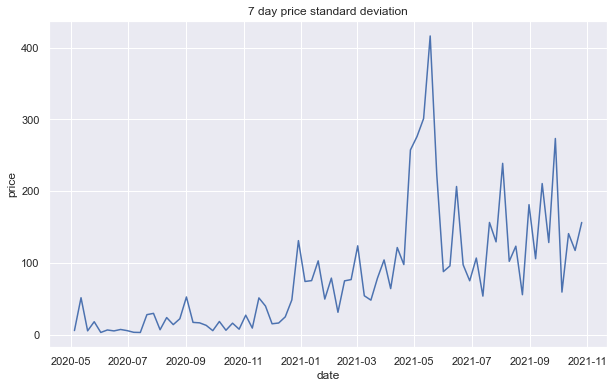

In [534]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=daily_data_indexed_df.index, y=daily_data_indexed_df.price)

ax.set_title('7 day price standard deviation')

In [304]:
daily_data = []
last_date = 0

for skip in tqdm(range(0, 2)):
    try:
        contract_id = '0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc'

        query = gql(
            'query{\n'
             'pairDayDatas(first: 1000, orderBy: date, orderDirection: asc,\n'
               'where: {\n'
                 f'pairAddress: "{contract_id}",\n'
                 f'date_gt: {last_date}\n'
               '}\n'
             ') {\n'
                 'date\n'
                 'dailyVolumeToken0\n'
                 'dailyVolumeToken1\n'
                 'dailyVolumeUSD\n'
                 'reserveUSD\n'
                 'reserve0\n'
                 'reserve1\n'
             '}\n'
            '}\n'
        )


        response = client.execute(query)

        last_date = response['pairDayDatas'][-1]['date']

        daily_data.extend(response['pairDayDatas'])

    except Exception as e:
        print(e)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.10s/it]

list index out of range


In [305]:
daily_data[-1]

{'dailyVolumeToken0': '24915085.415522',
 'dailyVolumeToken1': '5680.061368986069594492',
 'dailyVolumeUSD': '24920570.12106562686398889378923235',
 'date': 1635811200,
 'reserve0': '107847174.770106',
 'reserve1': '23972.16809338782940281',
 'reserveUSD': '215160386.7055837999777279287119999'}

In [306]:
daily_data

[{'dailyVolumeToken0': '0.011',
  'dailyVolumeToken1': '0.000054154581507407',
  'dailyVolumeUSD': '0',
  'date': 1588636800,
  'reserve0': '0.989',
  'reserve1': '0.004908523513507407',
  'reserveUSD': '0.9889999999999999999999999999999999'},
 {'dailyVolumeToken0': '0.001689',
  'dailyVolumeToken1': '0.000008395488675358',
  'dailyVolumeUSD': '0',
  'date': 1588723200,
  'reserve0': '0.988689',
  'reserve1': '0.004910094205790933',
  'reserveUSD': '0.9886889999999999999999999999999999'},
 {'dailyVolumeToken0': '0',
  'dailyVolumeToken1': '0',
  'dailyVolumeUSD': '0',
  'date': 1588809600,
  'reserve0': '0.98869',
  'reserve1': '0.004910094205805075',
  'reserveUSD': '0.9886900000000000000000000000000001'},
 {'dailyVolumeToken0': '0',
  'dailyVolumeToken1': '0',
  'dailyVolumeUSD': '0',
  'date': 1588896000,
  'reserve0': '6.574471',
  'reserve1': '0.030997527734467303',
  'reserveUSD': '6.574471000000000000000000000000001'},
 {'dailyVolumeToken0': '0.397513',
  'dailyVolumeToken1': '0

In [307]:
daily_data

[{'dailyVolumeToken0': '0.011',
  'dailyVolumeToken1': '0.000054154581507407',
  'dailyVolumeUSD': '0',
  'date': 1588636800,
  'reserve0': '0.989',
  'reserve1': '0.004908523513507407',
  'reserveUSD': '0.9889999999999999999999999999999999'},
 {'dailyVolumeToken0': '0.001689',
  'dailyVolumeToken1': '0.000008395488675358',
  'dailyVolumeUSD': '0',
  'date': 1588723200,
  'reserve0': '0.988689',
  'reserve1': '0.004910094205790933',
  'reserveUSD': '0.9886889999999999999999999999999999'},
 {'dailyVolumeToken0': '0',
  'dailyVolumeToken1': '0',
  'dailyVolumeUSD': '0',
  'date': 1588809600,
  'reserve0': '0.98869',
  'reserve1': '0.004910094205805075',
  'reserveUSD': '0.9886900000000000000000000000000001'},
 {'dailyVolumeToken0': '0',
  'dailyVolumeToken1': '0',
  'dailyVolumeUSD': '0',
  'date': 1588896000,
  'reserve0': '6.574471',
  'reserve1': '0.030997527734467303',
  'reserveUSD': '6.574471000000000000000000000000001'},
 {'dailyVolumeToken0': '0.397513',
  'dailyVolumeToken1': '0

In [309]:
def transform_data(x):
    reserve0 = x['reserve0']
    reserve1 = x['reserve1']
    reserveUSD = x['reserveUSD']
    dailyVolumeToken0 = x['dailyVolumeToken0']
    dailyVolumeToken1 = x['dailyVolumeToken1']
    date = x['date']
    
    return {
        'reserve0': reserve0,
        'reserve1': reserve1,
        'reserveUSD': reserveUSD,
        'dailyVolumeToken0': dailyVolumeToken0,
        'dailyVolumeToken1': dailyVolumeToken1,
        'date': date
    }
    
daily_data_transformed = [transform_data(x) for x in daily_data]

In [310]:
daily_data_transformed

[{'reserve0': '0.989',
  'reserve1': '0.004908523513507407',
  'reserveUSD': '0.9889999999999999999999999999999999',
  'dailyVolumeToken0': '0.011',
  'dailyVolumeToken1': '0.000054154581507407',
  'date': 1588636800},
 {'reserve0': '0.988689',
  'reserve1': '0.004910094205790933',
  'reserveUSD': '0.9886889999999999999999999999999999',
  'dailyVolumeToken0': '0.001689',
  'dailyVolumeToken1': '0.000008395488675358',
  'date': 1588723200},
 {'reserve0': '0.98869',
  'reserve1': '0.004910094205805075',
  'reserveUSD': '0.9886900000000000000000000000000001',
  'dailyVolumeToken0': '0',
  'dailyVolumeToken1': '0',
  'date': 1588809600},
 {'reserve0': '6.574471',
  'reserve1': '0.030997527734467303',
  'reserveUSD': '6.574471000000000000000000000000001',
  'dailyVolumeToken0': '0',
  'dailyVolumeToken1': '0',
  'date': 1588896000},
 {'reserve0': '6.562244',
  'reserve1': '0.031060935202990258',
  'reserveUSD': '6.562244',
  'dailyVolumeToken0': '0.397513',
  'dailyVolumeToken1': '0.0019365

In [311]:
daily_data_df = pd.DataFrame(daily_data_transformed)

In [316]:
daily_data_df['reserve0'] = daily_data_df['reserve0'].astype('float')
daily_data_df['reserve1'] = daily_data_df['reserve1'].astype('float')
daily_data_df['reserveUSD'] = daily_data_df['reserveUSD'].astype('float')
daily_data_df['dailyVolumeToken0'] = daily_data_df['dailyVolumeToken0'].astype('float')
daily_data_df['dailyVolumeToken1'] = daily_data_df['dailyVolumeToken1'].astype('float')
daily_data_df['date'] =  pd.to_datetime(daily_data_df['date'], unit='s')

In [326]:
daily_data_df

,reserve0,reserve1,reserveUSD,dailyVolumeToken0,dailyVolumeToken1,date
0,9.890000e-01,0.004909,9.890000e-01,1.100000e-02,0.000054,2020-05-05
1,9.886890e-01,0.004910,9.886890e-01,1.689000e-03,0.000008,2020-05-06
2,9.886900e-01,0.004910,9.886900e-01,0.000000e+00,0.000000,2020-05-07
3,6.574471e+00,0.030998,6.574471e+00,0.000000e+00,0.000000,2020-05-08
4,6.562244e+00,0.031061,6.562244e+00,3.975130e-01,0.001937,2020-05-11
...,...,...,...,...,...,...
540,1.077349e+08,24409.828185,2.156249e+08,4.389148e+07,10055.074738,2021-10-29
541,1.059818e+08,24570.718610,2.120460e+08,4.783587e+07,11072.488066,2021-10-30
542,1.060291e+08,24589.460724,2.116888e+08,3.971626e+07,9290.840017,2021-10-31
543,1.057122e+08,24482.954049,2.119498e+08,3.311855e+07,7712.696964,2021-11-01


In [327]:
# 0 - usdc
# 1 - eth

Text(0, 0.5, 'ETH')

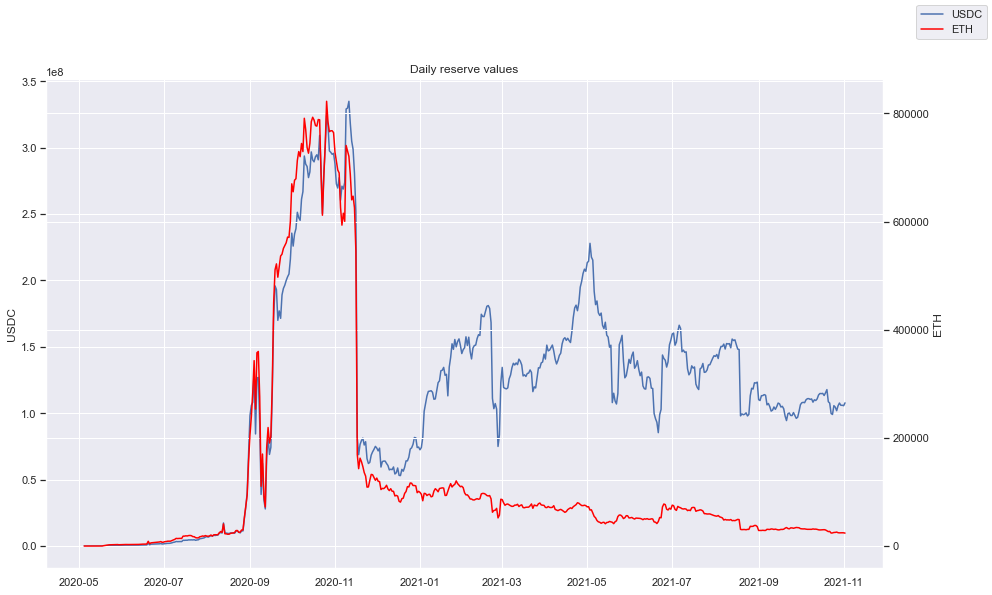

In [599]:
fig, ax1 = plt.subplots(figsize=(15, 9))

ax2 = ax1.twinx()

ax1.plot_date(daily_data_df.date, daily_data_df.reserve0, linestyle='solid', marker=None, label='USDC')
ax2.plot_date(daily_data_df.date, daily_data_df.reserve1, linestyle='solid', marker=None, color='red', label='ETH')

ax1.set_title("Daily reserve values")
fig.legend()

ax1.set_ylabel("USDC")
ax2.set_ylabel("ETH")

Text(0, 0.5, 'ETH')

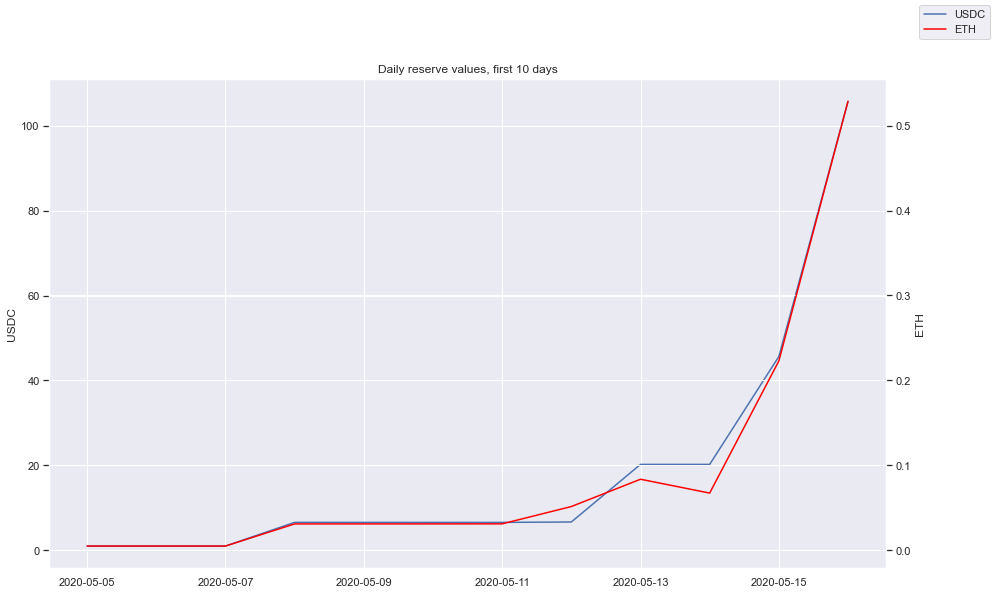

In [600]:
fig, ax1 = plt.subplots(figsize=(15, 9))

ax2 = ax1.twinx()

ax1.plot_date(daily_data_df.iloc[:10].date, daily_data_df.iloc[:10].reserve0, linestyle='solid', marker=None, label='USDC')
ax2.plot_date(daily_data_df.iloc[:10].date, daily_data_df.iloc[:10].reserve1, linestyle='solid', marker=None, color='red', label='ETH')

ax1.set_title("Daily reserve values, first 10 days")
fig.legend()

ax1.set_ylabel("USDC")
ax2.set_ylabel("ETH")

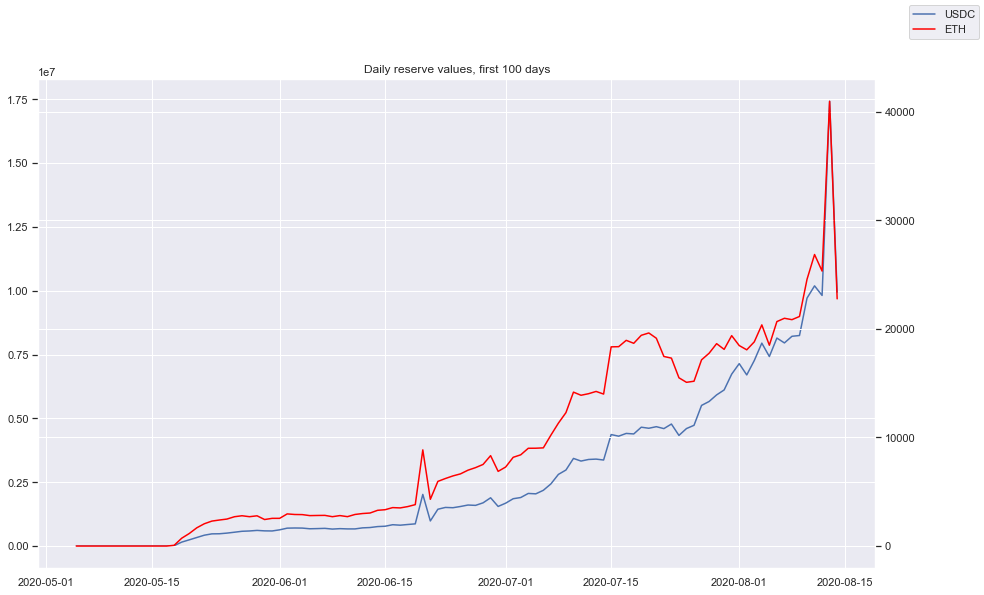

In [550]:
fig, ax1 = plt.subplots(figsize=(15, 9))

ax2 = ax1.twinx()

ax1.plot_date(daily_data_df.iloc[:100].date, daily_data_df.iloc[:100].reserve0, linestyle='solid', marker=None, label='USDC')
ax2.plot_date(daily_data_df.iloc[:100].date, daily_data_df.iloc[:100].reserve1, linestyle='solid', marker=None, color='red', label='ETH')

ax1.set_title("Daily reserve values, first 100 days")
fig.legend()



**Observation:**
    
Cauchy scale should be decreased for the pools with small reserves (because of high price impact).

E.G.
in a pool usdc-usdt 1000:1000 reserves,
a transaction amount_in 999 is very unprobable,

while if the reserves are higher, it's very likely

In [551]:
daily_data_df['price'] = daily_data_df['reserve0'] / daily_data_df['reserve1']

Text(0.5, 1.0, 'Price ETH/USDC')

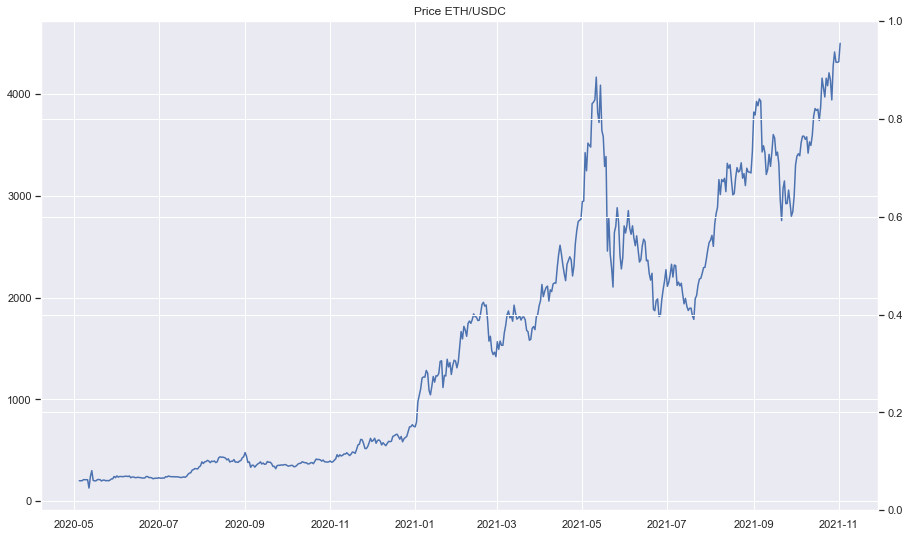

In [554]:
fig, ax1 = plt.subplots(figsize=(15, 9))

ax2 = ax1.twinx()

ax1.plot_date(daily_data_df.date, daily_data_df.price, linestyle='solid', marker=None, label='Number of transactions')
ax1.set_title("Price ETH/USDC")

In [ ]:
transactions_time = swaps_df.copy()
transactions_time.timestamp = pd.to_datetime(swaps_df.timestamp, unit='s')
# set index datetime column
transactions_time.index = transactions_time.timestamp
transactions_time = transactions_time.resample('1D').size()
transactions_avg_time = transactions_time.rolling('7D').mean()

fig, ax = plt.subplots(figsize=(15, 9))
fig.autofmt_xdate()

ax.plot_date(transactions_time.index, transactions_time, linestyle='solid', marker=None, label='Number of transactions')
ax.plot_date(transactions_avg_time.index, transactions_avg_time, linestyle='solid', marker=None, color='red', label='Moving average')
#ax.set_xlim(mess_time_tg_df.index.min(), mess_time_tg_df.index.max())
#ax.set_title("Message frequency over time (WhatsApp)")
ax.set_xlabel("Time")
ax.set_ylabel("Average transaction value each day")
fig.legend()

## Mints

In [635]:
sample_transport = RequestsHTTPTransport(url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2',
                                        verify=True, retries=3)

client = Client(transport=sample_transport)

all_mints = []
last_timestamp = 0

for skip in tqdm(range(0, 50)):
    try:
        contract_id = '0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc'
        query = gql(
            'query {\n'
             'mints(first: 1000, \n'
              'where: { '
                'pair: "0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc" \n'
                f'timestamp_gt: {last_timestamp}\n'
              '}, \n'
              'orderBy: timestamp, \n'
              'orderDirection: asc\n'
            ') {\n'
               'transaction {\nid\ntimestamp\n}\n'
               'to\n'
               'liquidity\n'
               'amount0\namount1\namountUSD\n'
             '}\n'
            '}\n'
        )

        response = client.execute(query)
        last_timestamp = response['mints'][-1]['transaction']['timestamp']
        all_mints.extend(response['mints'])

    except Exception as e:
        print(e)

 68%|█████████████████████████████████████████████████████████████████▉                               | 34/50 [00:42<00:15,  1.04it/s]

list index out of range



 70%|███████████████████████████████████████████████████████████████████▉                             | 35/50 [00:42<00:11,  1.36it/s]

list index out of range



 72%|█████████████████████████████████████████████████████████████████████▊                           | 36/50 [00:43<00:08,  1.71it/s]

list index out of range



 74%|███████████████████████████████████████████████████████████████████████▊                         | 37/50 [00:43<00:06,  2.11it/s]

list index out of range


 78%|███████████████████████████████████████████████████████████████████████████▋                     | 39/50 [00:43<00:03,  2.95it/s]

list index out of range
list index out of range


 82%|███████████████████████████████████████████████████████████████████████████████▌                 | 41/50 [00:44<00:02,  3.60it/s]

list index out of range
list index out of range



 84%|█████████████████████████████████████████████████████████████████████████████████▍               | 42/50 [00:44<00:02,  3.90it/s]

list index out of range


 88%|█████████████████████████████████████████████████████████████████████████████████████▎           | 44/50 [00:44<00:01,  4.21it/s]

list index out of range
list index out of range


 92%|█████████████████████████████████████████████████████████████████████████████████████████▏       | 46/50 [00:45<00:00,  4.43it/s]

list index out of range
list index out of range



 94%|███████████████████████████████████████████████████████████████████████████████████████████▏     | 47/50 [00:45<00:00,  4.39it/s]

list index out of range



 96%|█████████████████████████████████████████████████████████████████████████████████████████████    | 48/50 [00:45<00:00,  4.42it/s]

list index out of range



 98%|███████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [00:46<00:00,  4.42it/s]

list index out of range


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:46<00:00,  1.08it/s]

list index out of range


In [636]:
all_mints

[{'amount0': '1',
  'amount1': '0.004854368932',
  'amountUSD': '1',
  'liquidity': '0.000000069673300428',
  'to': '0x8688a84fcfd84d8f78020d0fc0b35987cc58911f',
  'transaction': {'id': '0x2ef96febd1777e0403768e45e46dbd677f21079ba5f88297b500806b6fef23cb',
   'timestamp': '1588712832'}},
 {'amount0': '0.003263',
  'amount1': '0.000016204931372248',
  'amountUSD': '0.003263000000000139758666867410337892',
  'liquidity': '0.000000000229944889',
  'to': '0xb2a482fe16b642f73afeeb90a519fe2b5901586c',
  'transaction': {'id': '0x641c3f3d088f427cd8479c8ed5940d6c40e3fee3f72e9c527739d6345fb1491e',
   'timestamp': '1588863375'}},
 {'amount0': '0.01419',
  'amount1': '0.000070471266807973',
  'amountUSD': '0.01419000000000016285700980343639901',
  'liquidity': '0.000000000999973851',
  'to': '0x3f6cdd93e4a1c2df9934cb90d09040ccfc155f93',
  'transaction': {'id': '0x62fc148c8a99742fa601d9f59d84fe0beb61be2d000de60a60b10912deea04a2',
   'timestamp': '1588904954'}},
 {'amount0': '0.05',
  'amount1': '0.0

In [637]:
all_mints

[{'amount0': '1',
  'amount1': '0.004854368932',
  'amountUSD': '1',
  'liquidity': '0.000000069673300428',
  'to': '0x8688a84fcfd84d8f78020d0fc0b35987cc58911f',
  'transaction': {'id': '0x2ef96febd1777e0403768e45e46dbd677f21079ba5f88297b500806b6fef23cb',
   'timestamp': '1588712832'}},
 {'amount0': '0.003263',
  'amount1': '0.000016204931372248',
  'amountUSD': '0.003263000000000139758666867410337892',
  'liquidity': '0.000000000229944889',
  'to': '0xb2a482fe16b642f73afeeb90a519fe2b5901586c',
  'transaction': {'id': '0x641c3f3d088f427cd8479c8ed5940d6c40e3fee3f72e9c527739d6345fb1491e',
   'timestamp': '1588863375'}},
 {'amount0': '0.01419',
  'amount1': '0.000070471266807973',
  'amountUSD': '0.01419000000000016285700980343639901',
  'liquidity': '0.000000000999973851',
  'to': '0x3f6cdd93e4a1c2df9934cb90d09040ccfc155f93',
  'transaction': {'id': '0x62fc148c8a99742fa601d9f59d84fe0beb61be2d000de60a60b10912deea04a2',
   'timestamp': '1588904954'}},
 {'amount0': '0.05',
  'amount1': '0.0

In [638]:
all_mints[0]

{'amount0': '1',
 'amount1': '0.004854368932',
 'amountUSD': '1',
 'liquidity': '0.000000069673300428',
 'to': '0x8688a84fcfd84d8f78020d0fc0b35987cc58911f',
 'transaction': {'id': '0x2ef96febd1777e0403768e45e46dbd677f21079ba5f88297b500806b6fef23cb',
  'timestamp': '1588712832'}}

In [639]:
def transform_data2(x):
    amount0 = x['amount0']
    amount1 = x['amount1']
    amountUSD = x['amountUSD']
    liquidity = x['liquidity']
    timestamp = x['transaction']['timestamp']
    
    return {'amount0': amount0, 'amount1': amount1,
            'amountUSD': amountUSD, 'liquidity': liquidity, 'timestamp': timestamp}
    
all_mints_transformed = [transform_data2(x) for x in all_mints]

In [640]:
all_mints_df = pd.DataFrame(all_mints_transformed)
all_mints_df.head()

,amount0,amount1,amountUSD,liquidity,timestamp
0,1,0.004854368932,1,0.000000069673300428,1588712832
1,0.003263,0.000016204931372248,0.003263000000000139758666867410337892,0.000000000229944889,1588863375
2,0.01419,0.000070471266807973,0.01419000000000016285700980343639901,0.000000000999973851,1588904954
3,0.05,0.000234858426772527,0.04741449563916407412438738062898118,0.000000003332596336,1588969108
4,0.53578,0.0025,0.5148727126454563833967814425643903,0.00000003547452376,1588974640


In [641]:
all_mints_df['amount0'] = all_mints_df.amount0.astype('float')
all_mints_df['amount1'] = all_mints_df.amount1.astype('float')
all_mints_df['amountUSD'] = all_mints_df.amountUSD.astype('float')
all_mints_df['liquidity'] = all_mints_df.liquidity.astype('float')
all_mints_df['timestamp'] = pd.to_datetime(all_mints_df['timestamp'], unit='s')

In [642]:
all_mints_df

,amount0,amount1,amountUSD,liquidity,timestamp
0,1.000000,0.004854,1.000000,6.967330e-08,2020-05-05 21:07:12
1,0.003263,0.000016,0.003263,2.299449e-10,2020-05-07 14:56:15
2,0.014190,0.000070,0.014190,9.999739e-10,2020-05-08 02:29:14
3,0.050000,0.000235,0.047414,3.332596e-09,2020-05-08 20:18:28
4,0.535780,0.002500,0.514873,3.547452e-08,2020-05-08 21:50:40
...,...,...,...,...,...
32825,109799.226937,23.795255,219758.711136,9.092367e-04,2021-11-03 01:58:19
32826,572.381664,0.124813,1146.467498,4.754384e-06,2021-11-03 02:46:26
32827,985.165880,0.215170,1974.038472,8.189511e-06,2021-11-03 03:21:15
32828,987.949493,0.215692,1976.927970,8.209655e-06,2021-11-03 11:09:29


In [643]:
all_mints_df.amount0.sort_values(ascending=False)[:50]

17629    4.000003e+07
17864    3.469860e+07
16480    3.401919e+07
16487    3.319228e+07
17976    2.815801e+07
16377    2.624596e+07
26834    2.544098e+07
18058    2.500054e+07
18129    2.491972e+07
16471    2.348005e+07
32588    2.287564e+07
28380    2.272338e+07
19520    2.130353e+07
32591    1.974959e+07
17782    1.833540e+07
26084    1.826649e+07
19517    1.806506e+07
32585    1.795502e+07
19782    1.787107e+07
32582    1.544951e+07
19524    1.503460e+07
31640    1.498945e+07
14805    1.485934e+07
10919    1.417500e+07
20315    1.386048e+07
32091    1.331588e+07
20227    1.331212e+07
31639    1.311559e+07
32100    1.306691e+07
32112    1.282126e+07
31638    1.269190e+07
20137    1.166778e+07
31919    1.112723e+07
25158    1.107466e+07
31955    1.063711e+07
31764    1.060446e+07
31798    1.053584e+07
16157    1.047455e+07
31751    1.042643e+07
31838    1.025668e+07
31982    1.018908e+07
18214    1.000000e+07
31583    9.997093e+06
32159    9.973119e+06
31999    9.931579e+06
32019    9

Text(0.5, 1.0, 'Burns USDC amount, histogram')

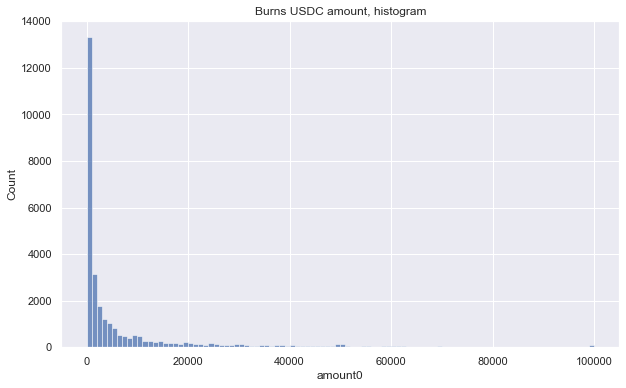

In [644]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(all_mints_df['amount0'], binrange=[0, 100000], bins=100)

ax.set_title("Burns USDC amount, histogram")

Text(0.5, 1.0, 'Burns ETH amount, histogram')

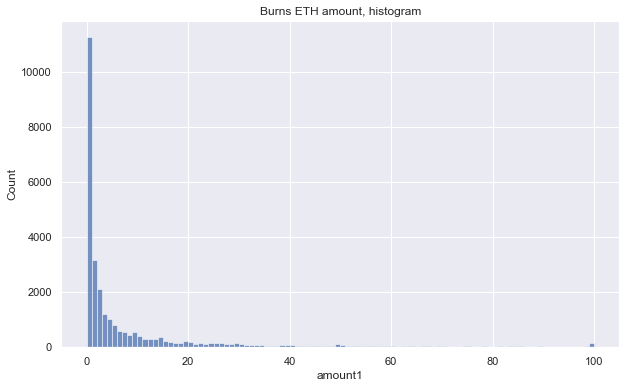

In [645]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(all_mints_df['amount1'], binrange=[0, 100], bins=100)

ax.set_title("Burns ETH amount, histogram")

Text(0.5, 1.0, 'First 500 Burns USDC')

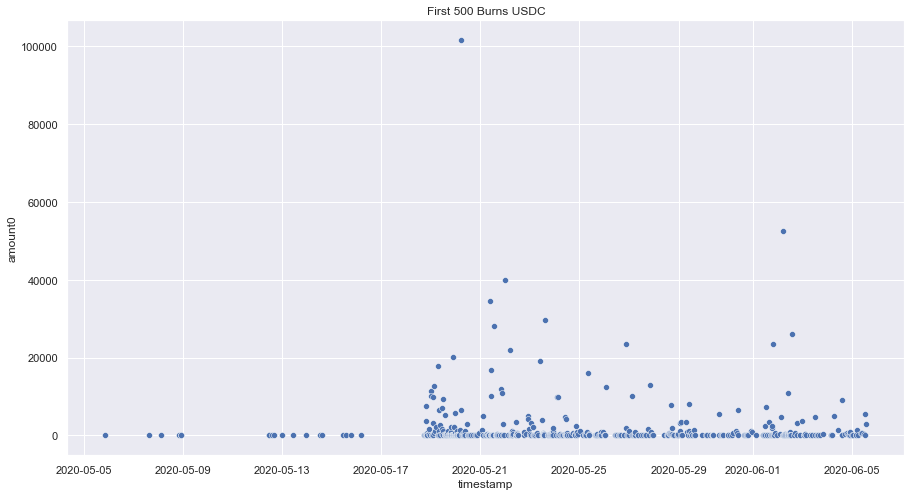

In [646]:
fig, ax = plt.subplots(figsize=(15, 8))

_slice = all_mints_df.iloc[:500]
sns.scatterplot(x=_slice.timestamp, y=_slice.amount0)

ax.set_title("First 500 Burns USDC")

Text(0.5, 1.0, 'First 10 000 Burns USDC')

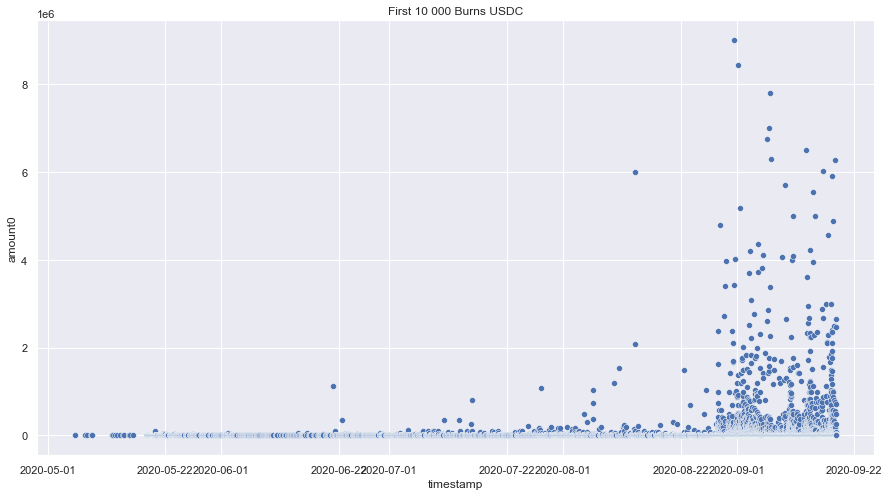

In [647]:
fig, ax = plt.subplots(figsize=(15, 8))

_slice = all_mints_df.iloc[:10000]
sns.scatterplot(x=_slice.timestamp, y=_slice.amount0)

ax.set_title("First 10 000 Burns USDC")

Text(0.5, 1.0, 'First 10 000 Mints USDC')

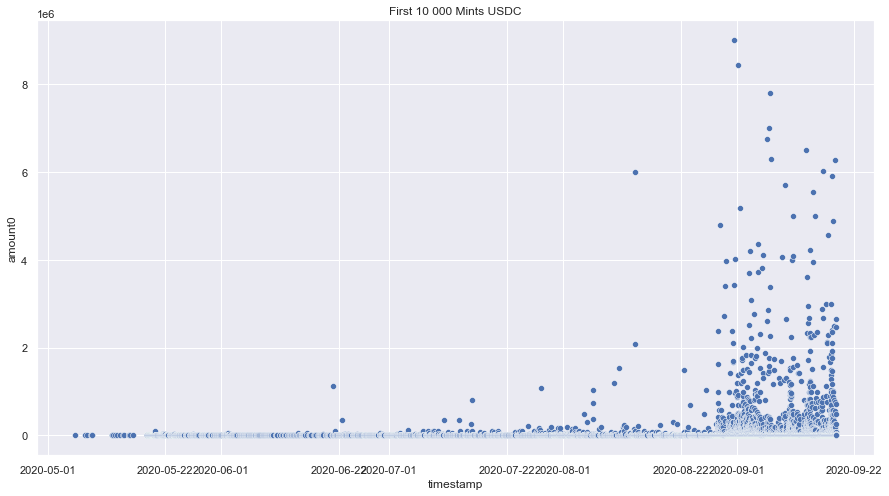

In [648]:
fig, ax = plt.subplots(figsize=(15, 8))

_slice = all_mints_df.iloc[:10000]
sns.scatterplot(x=_slice.timestamp, y=_slice.amount0)

ax.set_title("First 10 000 Mints USDC")

Text(0.5, 1.0, 'All Burns USDC')

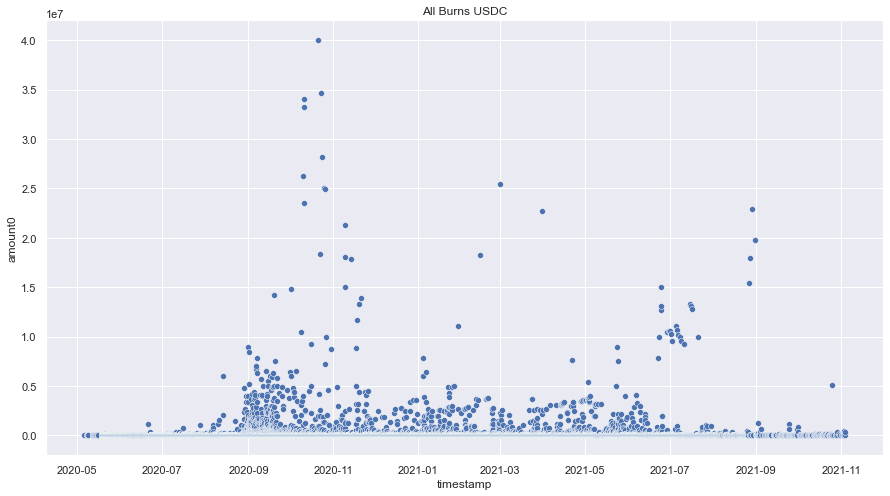

In [649]:
fig, ax = plt.subplots(figsize=(15, 8))

_slice = all_mints_df
sns.scatterplot(x=_slice.timestamp, y=_slice.amount0)

ax.set_title("All Burns USDC")

In [650]:
all_mints_df

,amount0,amount1,amountUSD,liquidity,timestamp
0,1.000000,0.004854,1.000000,6.967330e-08,2020-05-05 21:07:12
1,0.003263,0.000016,0.003263,2.299449e-10,2020-05-07 14:56:15
2,0.014190,0.000070,0.014190,9.999739e-10,2020-05-08 02:29:14
3,0.050000,0.000235,0.047414,3.332596e-09,2020-05-08 20:18:28
4,0.535780,0.002500,0.514873,3.547452e-08,2020-05-08 21:50:40
...,...,...,...,...,...
32825,109799.226937,23.795255,219758.711136,9.092367e-04,2021-11-03 01:58:19
32826,572.381664,0.124813,1146.467498,4.754384e-06,2021-11-03 02:46:26
32827,985.165880,0.215170,1974.038472,8.189511e-06,2021-11-03 03:21:15
32828,987.949493,0.215692,1976.927970,8.209655e-06,2021-11-03 11:09:29


In [651]:
all_mints_df.amount0

0             1.000000
1             0.003263
2             0.014190
3             0.050000
4             0.535780
             ...      
32825    109799.226937
32826       572.381664
32827       985.165880
32828       987.949493
32829    320300.000000
Name: amount0, Length: 32830, dtype: float64

C:\Users\dimat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='timestamp', ylabel='amount1'>

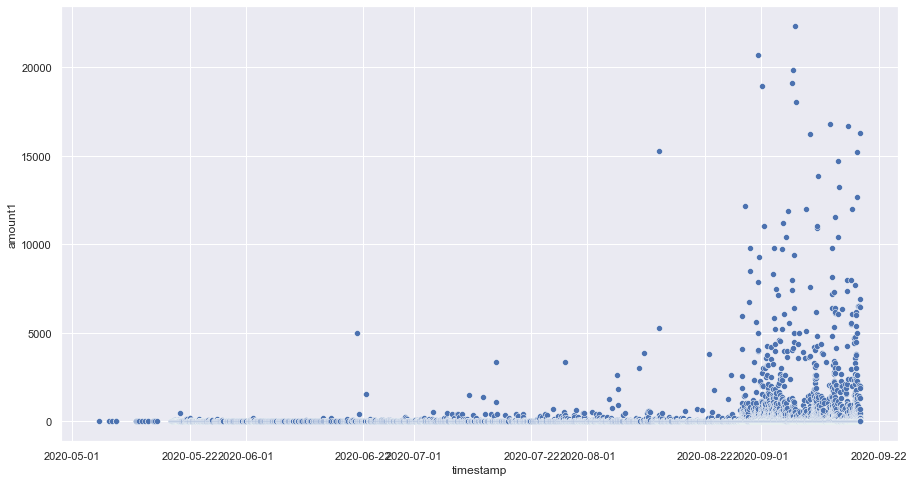

In [652]:
fig, ax = plt.subplots(figsize=(15, 8))

_slice = all_mints_df.iloc[:10000]
sns.scatterplot(_slice.timestamp, _slice.amount1)

In [653]:
swaps_usdc_df = swaps_df[swaps_df.token_in == 'USDC']

C:\Users\dimat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='timestamp', ylabel='amount_in'>

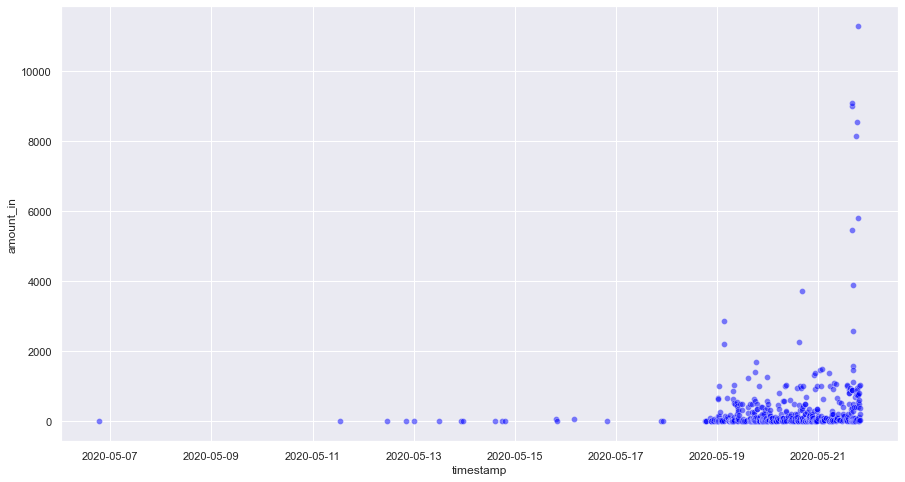

In [654]:
fig, ax = plt.subplots(figsize=(15, 8))

_slice = swaps_usdc_df.iloc[:500]
sns.scatterplot(_slice.timestamp, _slice.amount_in, alpha=0.5, color='blue')

C:\Users\dimat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='timestamp', ylabel='amount_in'>

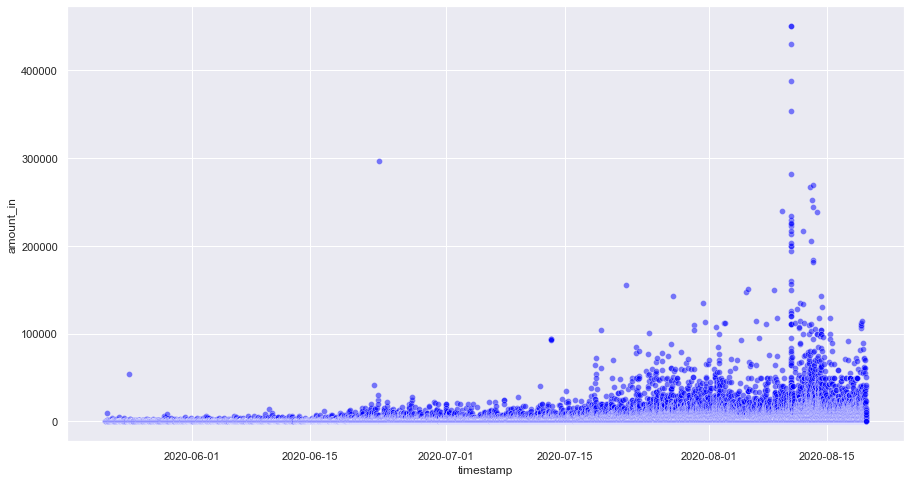

In [655]:
fig, ax = plt.subplots(figsize=(15, 8))

_slice = swaps_usdc_df.iloc[500:80090]
sns.scatterplot(_slice.timestamp, _slice.amount_in, alpha=0.5, color='blue')

In [656]:
all_burns = []
last_timestamp = 0

for skip in tqdm(range(0, 50)):
    try:
        contract_id = '0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc'
        query = gql(
            'query {\n'
             'burns(first: 1000, \n'
              'where: { '
                'pair: "0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc" \n'
                f'timestamp_gt: {last_timestamp}\n'
              '}, \n'
              'orderBy: timestamp, \n'
              'orderDirection: asc\n'
            ') {\n'
               'transaction {\nid\ntimestamp\n}\n'
               'to\n'
               'liquidity\n'
               'amount0\namount1\namountUSD\n'
             '}\n'
            '}\n'
        )

        response = client.execute(query)
        last_timestamp = response['burns'][-1]['transaction']['timestamp']
        all_burns.extend(response['burns'])

    except Exception as e:
        print(e)

 50%|████████████████████████████████████████████████▌                                                | 25/50 [00:29<00:21,  1.16it/s]

list index out of range



 52%|██████████████████████████████████████████████████▍                                              | 26/50 [00:29<00:16,  1.47it/s]

list index out of range



 54%|████████████████████████████████████████████████████▍                                            | 27/50 [00:29<00:12,  1.84it/s]

list index out of range



 56%|██████████████████████████████████████████████████████▎                                          | 28/50 [00:30<00:09,  2.24it/s]

list index out of range



 58%|████████████████████████████████████████████████████████▎                                        | 29/50 [00:30<00:08,  2.54it/s]

list index out of range



 60%|██████████████████████████████████████████████████████████▏                                      | 30/50 [00:30<00:06,  2.86it/s]

list index out of range


 64%|██████████████████████████████████████████████████████████████                                   | 32/50 [00:31<00:05,  3.44it/s]

list index out of range
list index out of range



 66%|████████████████████████████████████████████████████████████████                                 | 33/50 [00:31<00:04,  3.65it/s]

list index out of range



 68%|█████████████████████████████████████████████████████████████████▉                               | 34/50 [00:31<00:04,  3.84it/s]

list index out of range



 70%|███████████████████████████████████████████████████████████████████▉                             | 35/50 [00:31<00:04,  3.66it/s]

list index out of range



 72%|█████████████████████████████████████████████████████████████████████▊                           | 36/50 [00:32<00:03,  3.86it/s]

list index out of range



 74%|███████████████████████████████████████████████████████████████████████▊                         | 37/50 [00:32<00:03,  4.05it/s]

list index out of range



 76%|█████████████████████████████████████████████████████████████████████████▋                       | 38/50 [00:32<00:02,  4.01it/s]

list index out of range



 78%|███████████████████████████████████████████████████████████████████████████▋                     | 39/50 [00:32<00:02,  4.16it/s]

list index out of range



 80%|█████████████████████████████████████████████████████████████████████████████▌                   | 40/50 [00:33<00:02,  4.24it/s]

list index out of range



 82%|███████████████████████████████████████████████████████████████████████████████▌                 | 41/50 [00:33<00:02,  3.99it/s]

list index out of range



 84%|█████████████████████████████████████████████████████████████████████████████████▍               | 42/50 [00:33<00:01,  4.15it/s]

list index out of range



 86%|███████████████████████████████████████████████████████████████████████████████████▍             | 43/50 [00:33<00:01,  4.19it/s]

list index out of range



 88%|█████████████████████████████████████████████████████████████████████████████████████▎           | 44/50 [00:33<00:01,  4.27it/s]

list index out of range



 90%|███████████████████████████████████████████████████████████████████████████████████████▎         | 45/50 [00:34<00:01,  4.41it/s]

list index out of range



 92%|█████████████████████████████████████████████████████████████████████████████████████████▏       | 46/50 [00:34<00:00,  4.38it/s]

list index out of range



 94%|███████████████████████████████████████████████████████████████████████████████████████████▏     | 47/50 [00:34<00:00,  4.23it/s]

list index out of range



 96%|█████████████████████████████████████████████████████████████████████████████████████████████    | 48/50 [00:34<00:00,  4.37it/s]

list index out of range



 98%|███████████████████████████████████████████████████████████████████████████████████████████████  | 49/50 [00:35<00:00,  4.22it/s]

list index out of range


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:35<00:00,  1.41it/s]

list index out of range


In [657]:
all_burns_transformed = [transform_data2(x) for x in all_burns]

In [658]:
all_burns_df = pd.DataFrame(all_burns_transformed)
all_burns_df.head()

,amount0,amount1,amountUSD,liquidity,timestamp
0,0.003262,0.000016204931358106,0.003263003297473160957466150069959389,0.000000000229944889,1588866445
1,0.014189,0.000070471266771562,0.0141900143448880543282728178767232,0.000000000999973851,1588905839
2,0.781284,0.006538844915824964,0.7812847076462971975687865177197112,0.000000069604848126,1589314730
3,0.995309,0.004114337811302434,0.8361724536755546984513074419300853,0.000000062174332111,1589413701
4,1.097105,0.005132297184276266,1.047697442451546702450041554455778,0.000000072899216707,1589466281


In [659]:
all_burns_df['amount0'] = all_burns_df.amount0.astype('float')
all_burns_df['amount1'] = all_burns_df.amount1.astype('float')
all_burns_df['amountUSD'] = all_burns_df.amountUSD.astype('float')
all_burns_df['liquidity'] = all_burns_df.liquidity.astype('float')
all_burns_df['timestamp'] = pd.to_datetime(all_burns_df['timestamp'], unit='s')

In [664]:
all_burns_df_indexed_df = all_burns_df.copy()
all_burns_df_indexed_df.set_index('timestamp', inplace=True)
all_burns_df_indexed_df = all_burns_df_indexed_df.resample('7D').sum()

<AxesSubplot:xlabel='timestamp', ylabel='amount1'>

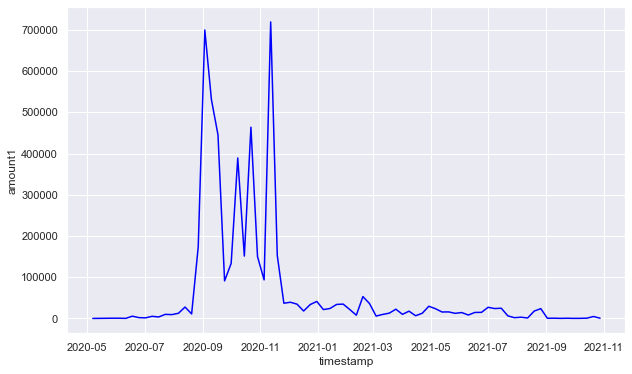

In [665]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x=all_burns_df_indexed_df.index, y=all_burns_df_indexed_df['amount1'], color='blue')

In [666]:
all_mints_df_indexed_df = all_mints_df.copy()
all_mints_df_indexed_df.set_index('timestamp', inplace=True)
all_mints_df_indexed_df = all_mints_df_indexed_df.resample('7D').sum()

Text(0.5, 1.0, 'ETH-USDC pair, mints and burns, 7 day sum')

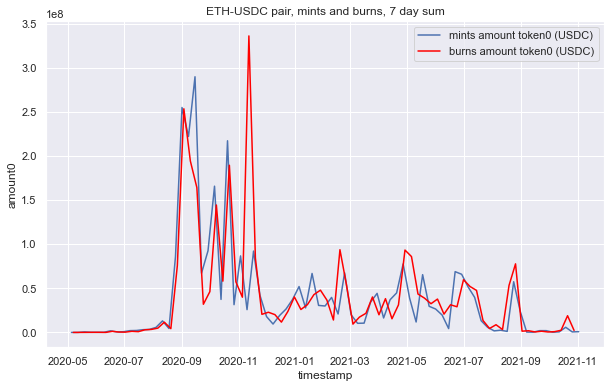

In [672]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x=all_mints_df_indexed_df.index, y=all_mints_df_indexed_df['amount0'], label='mints amount token0 (USDC)')
sns.lineplot(x=all_burns_df_indexed_df.index, y=all_burns_df_indexed_df['amount0'], color='red', label='burns amount token0 (USDC)')

ax.set_title("ETH-USDC pair, mints and burns, 7 day sum")

In [425]:
swaps_df.timestamp = pd.to_datetime(swaps_df.timestamp, unit='s')

Observation:

We are running the simulation not on a fixed time period (like 1 week), but during the time period which would cover N number of transactions
(to achieve the same number of transactions for different types of markets)